Ejercicio 3

Ahora vamos a crear una matriz donde vamos a concatenar el resultado de la transformación de cada una de las imágenes.
Para ello, antes de empezar el bucle genera una matriz vacía de tamaño [n_imágenes, n_filas, n_columnas, n_canales], esto es,
[15,1000,1500,3] (PISTA: La función zeros de numpy te ayudará). En cada iteración del bucle (i), almacena la imagen resultante en la
posición correspondiente de la matriz que hemos creado [i, :, :, :].

Para comprobar que se está almacenando la imagen correctamente, en cada iteración, muestra cada imagen resultante por pantalla.

In [1]:
import os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Vamos a repetir la función anterior para esta vez especificar también el color de relleno:

# Para esto vamos a crear una función que tome la imagen a rotar y el ángulo de rotación

def rotate_image(image, angle, fill_color=(0, 0, 0)):
    # Extraemos la altura y anchura de la imagen
    height, width = image.shape[:2]

    # Calculamos la matriz de rotación
    # Empleamos el centro de la imagen como punto sobre el que realizar la rotación
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Rotamos la imagen especificando el color de fondo
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderValue=fill_color)

    return rotated_image

In [3]:
# Zoom hacia dentro
# Hacemos la imagen más grande para simular ese zoom y recortamos los bordes para tener una imagen del tamaño original
def zoom_in(image, factor):
    # Calculamos el nuevo tamaño de la imagen
    new_width = int(image.shape[1] * factor)
    new_height = int(image.shape[0] * factor)

    # Redimensionamos la imagen al tamaño nuevo
    zoomed_in_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

    # Hacemos el zoom con respecto al centro de la imagen
    center_rows = int(zoomed_in_image.shape[0] / 2)
    center_cols = int(zoomed_in_image.shape[1] / 2)

    # Recortamos la imagen al tamaño original alrededor del centro
    start_rows = center_rows - int(image.shape[0] / 2)
    end_rows = start_rows + image.shape[0]

    start_cols = center_cols - int(image.shape[1] / 2)
    end_cols = start_cols + image.shape[1]

    zoomed_in_image = zoomed_in_image[start_rows:end_rows, start_cols:end_cols]

    return zoomed_in_image

In [4]:
def translation_border(image, rows_factor, cols_factor, border_mode=cv2.BORDER_REFLECT):
    # Calculamos el número de filas y columnas que se va a desplazar la imagen
    rows_to_move = int(image.shape[0] * rows_factor)
    cols_to_move = int(image.shape[1] * cols_factor)

    # Calculamos matriz de traslación
    translation_matrix = np.float32([[1, 0, -cols_to_move], [0, 1, rows_to_move]])
    img_translated = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]), borderMode=border_mode)

    return img_translated

EXERCISE CODE

In [5]:
def transform_image(path):
    # 1. Abrir la imagen y convertirla a un array de numpy.
    image = Image.open(path)
    img = np.array(image)

    # 2. Redimensionarla a un tamaño de 1000x1500.
    new_rows = 1_500
    new_cols = 1_000
    img = cv2.resize(img, (new_cols, new_rows))

    # 3. A la imagen redimensionada aplicarle las siguientes transformaciones:
    #    • Giro izquierda-derecha
    img = np.fliplr(img)

    #    • Rotación de 45º rellenando con valores (0, 0, 0).
    img = rotate_image(img, 45, (0, 0, 0))

    #    • Zoom hacia dentro con un factor de 1,4.
    img = zoom_in(img, 1.4)

    #    • Desplazamiento de la imagen hacia la esquina inferior derecha, con un factor de 0,3 en ambas direcciones. Para rellenar filas
    #      y columnas generadas emplea la imagen espejo.
    img = translation_border(img, 0.3, -0.3, border_mode=cv2.BORDER_REFLECT)

    return img

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen1.jpeg


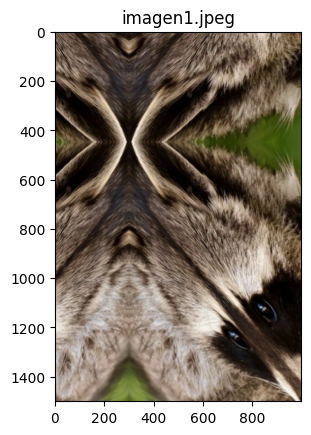

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen10.jpeg


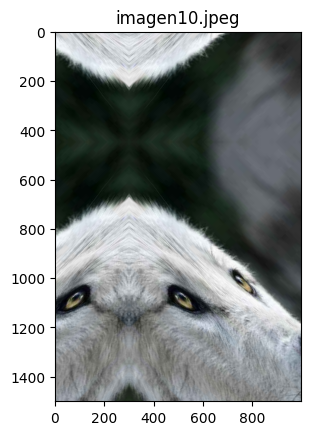

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen11.jpeg


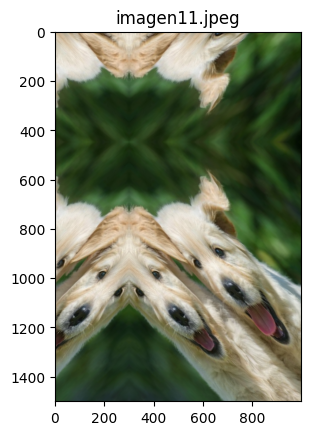

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen12.jpeg


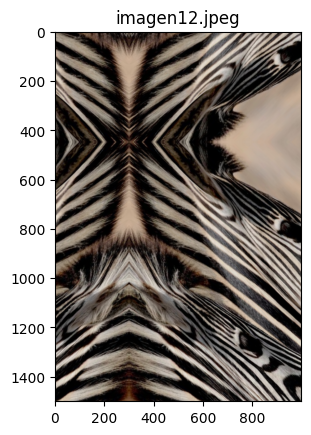

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen13.jpeg


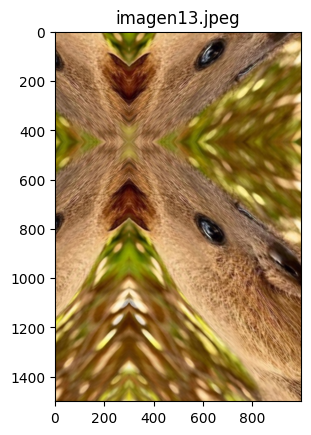

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen14.jpeg


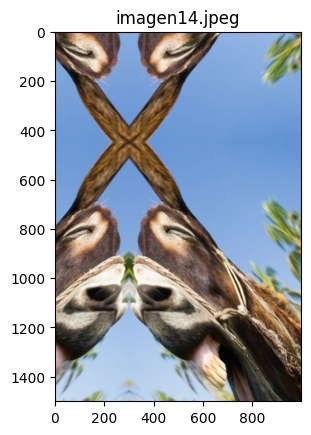

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen15.jpeg


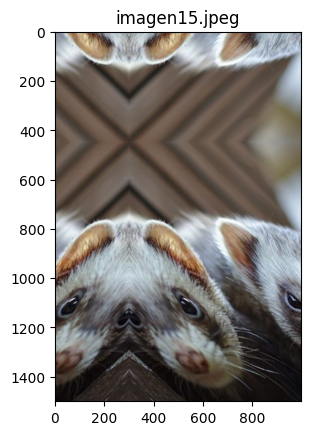

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen2.jpeg


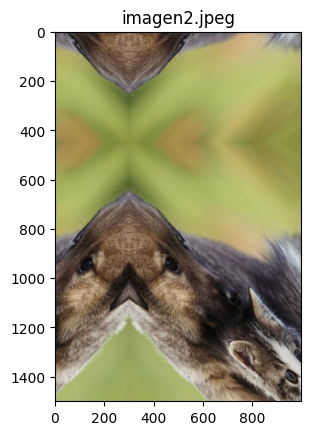

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen3.jpeg


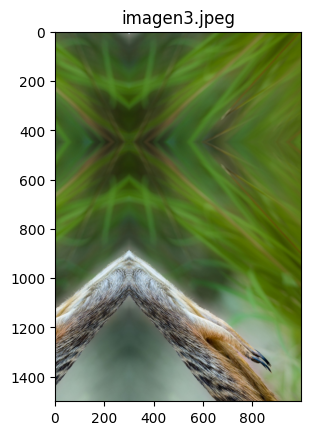

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen4.jpeg


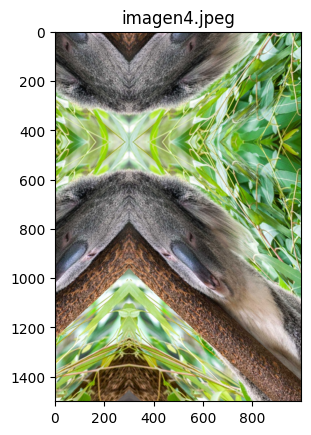

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen5.jpeg


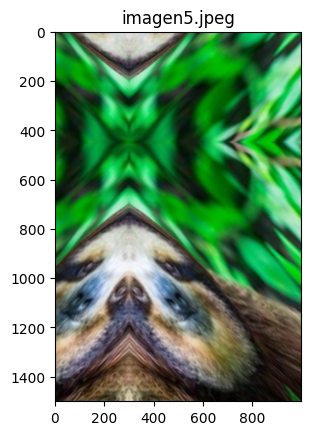

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen6.jpeg


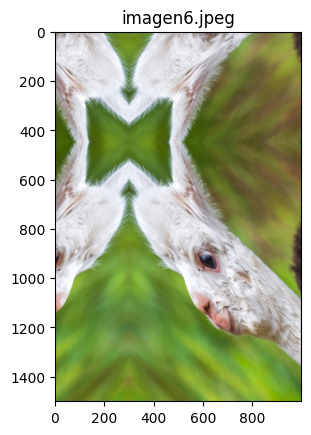

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen7.jpeg


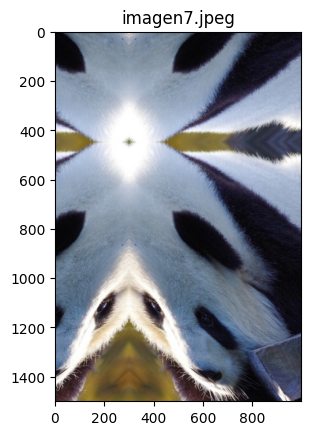

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen8.jpeg


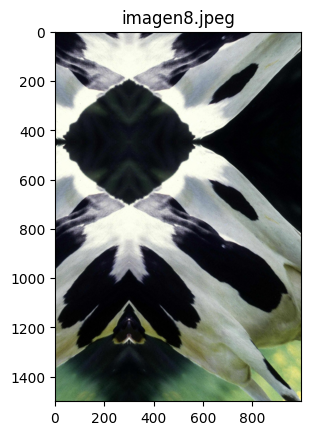

Image absolute path: C:\PersonalStuff\IABD\ProgramacionDeInteligencia\Ana\Unit01-ImageProcessing\images\practica\imagen9.jpeg


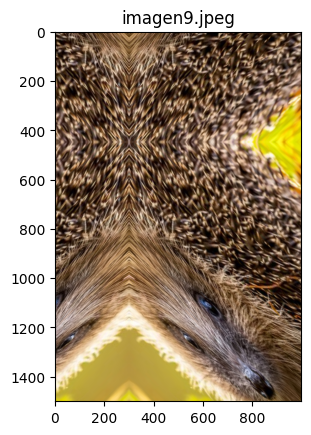

In [6]:
images_folder_path = './../images/practica'
images_folder_content = os.listdir(images_folder_path)
images_folder_absolute_path = [os.path.abspath(os.path.join(images_folder_path, img_path)) for img_path in
                               images_folder_content]

result = np.zeros((15, 1_500, 1_000, 3), dtype=np.int32)
for idx, img_path in enumerate(images_folder_absolute_path):
    result[idx, :, :, :] = transform_image(img_path)
    print(f"Image absolute path: {img_path}")
    plt.title(os.path.basename(img_path))
    plt.imshow(result[idx])
    plt.show()